# Prediciting heart disease using machine learning

A Machine Learning project using Scikit-learn and Pandas to create a Machine Learning model for a binary classification problem.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defintion
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Heart Disease

Original Data from the UCI Heart Disease Repository
http://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features

> Using 13 features to predict 1 target feature

### Data Dictionary

* age - Age of the patient in years
* sex - 
    * 1 - Male
    * 0 - Female
* cp - Chest Pain Type
     * typical angina
     * atypical angina
     * non-anginal
     * asymptomatic
* trestbps - Resting blood pressure(in mm Hg on admission to the hospital)
* chol - Serum cholesterol in mg/dl
* fbs - If Fasting Blood Sugar > 120 mg/dl
* restecg - Resting Electrocardiographic Results
    * normal
    * stt abnormality
    * lv hypertrophy
* thalach - Maximum Heart Rate Achieved
* exang - Exercise-induced Angina (True/False)
* oldpeak - ST depression induced by exercise relative to rest
* slope - The Slope of the P1eak Exercise ST segment
* ca - Number of Major Sessels (0-3) colored by fluoroscopy
* thal
    * normal
    * fixed defect
    * reversible defect
* target - The Target Attribute

## Preparing the tools

We're going to use Pandas, Matplotlib, NumPy for data analysis and manipulation

In [12]:
# Import all the tools we need

# EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Plots to appear inside the notebook
%matplotlib inline 

# Models from Scitkit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [13]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's the missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [14]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [15]:
# Let's find out how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

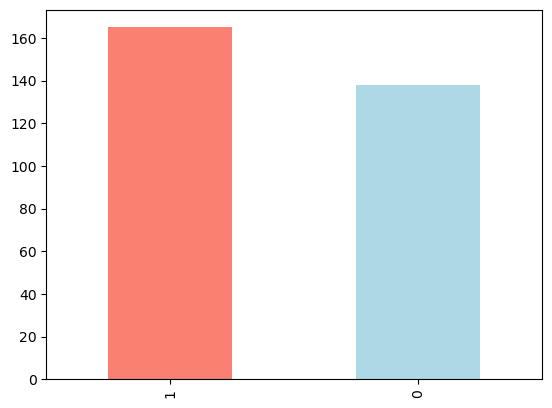

In [16]:
df['target'].value_counts().plot(kind="bar", color=['salmon','lightblue'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Heart Disase Frequency according to Sex

In [20]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

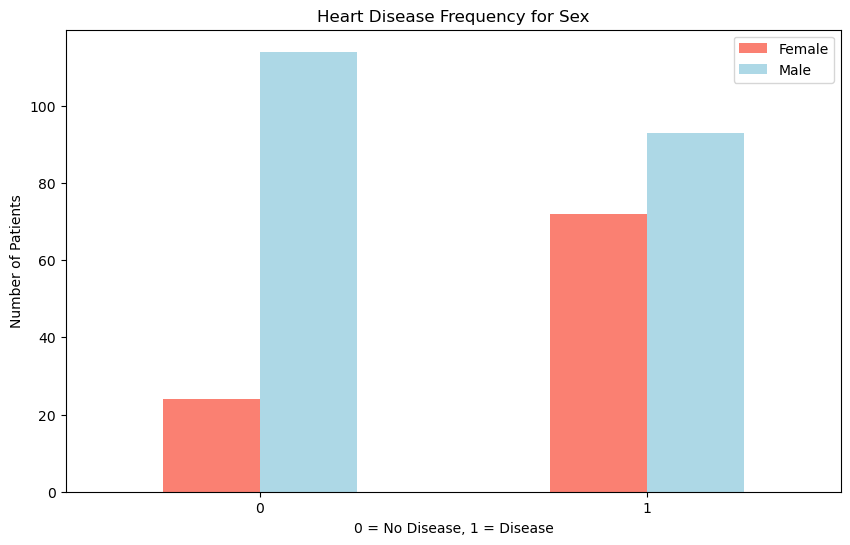

In [32]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])

plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Number of Patients')
plt.title('Heart Disease Frequency for Sex')
plt.legend(labels=['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

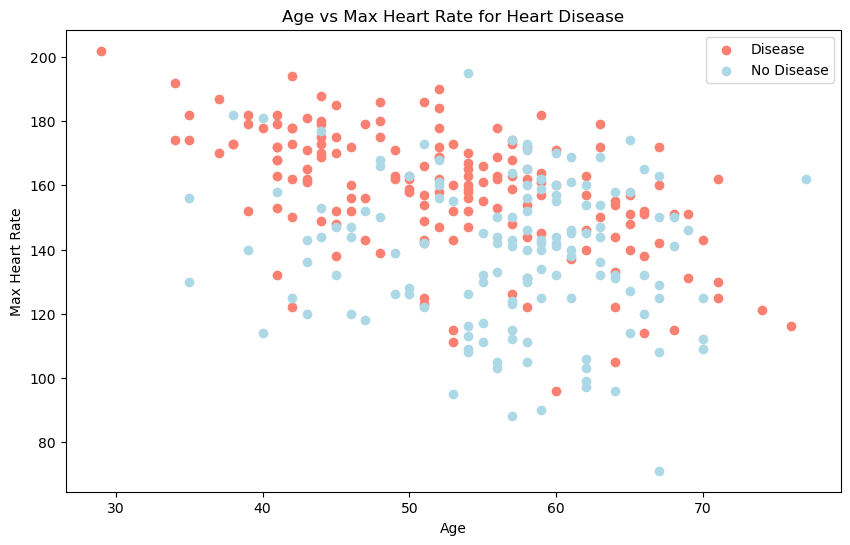

In [44]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')

# Scatter with positive examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate for Heart Disease')
plt.legend(labels=['Disease','No Disease']);

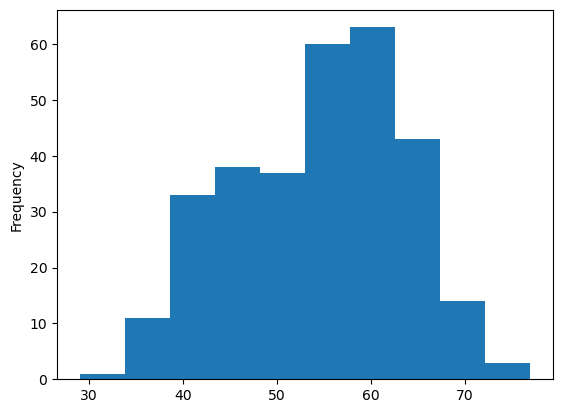

In [46]:
# Check the distribution of the age column with a histogram
df['age'].plot.hist();

### Heart Disease Frequency per Chest Pain Type

* cp - Chest Pain Type
     * 0 typical angina
     * 1 atypical angina
     * 2 non-anginal
     * 3 asymptomatic

In [47]:
pd.crosstab(df.cp,df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

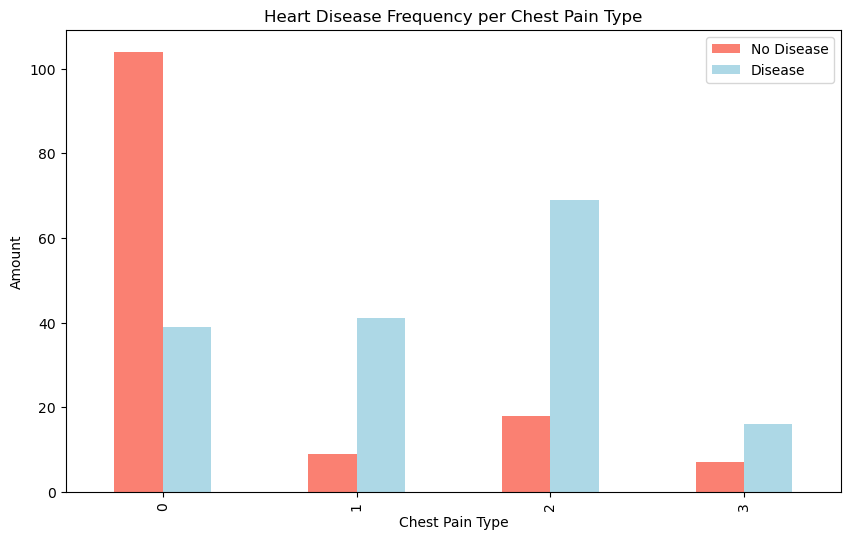

In [49]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease']);

In [50]:
# Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

(14.5, -0.5)

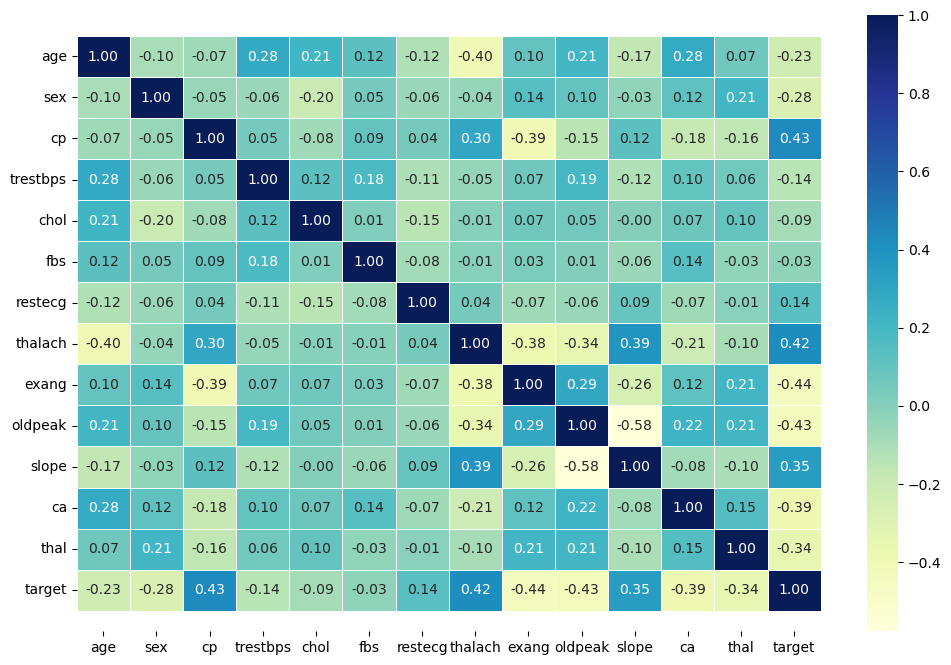

In [55]:
# Let's make our correlation matrix a little prettier

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [57]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [59]:
# Split date into X and y
X = df.drop("target", axis=1)
y= df['target']

In [61]:
# Split into train and test split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [62]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

Now we've got our data split into traing and test sets, it's time to train our model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifiers
3. Random Forest Classifier

In [67]:
# Put models in a dictionary

models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models: a dict of different Scikit-Learn models
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    models_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and apped its score the model_scores
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

In [70]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

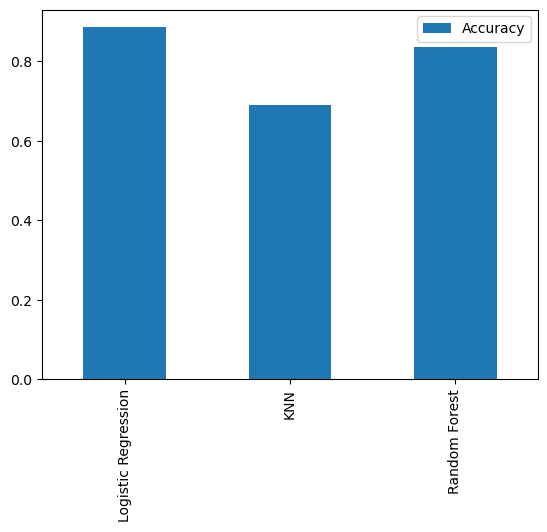

In [75]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

model_compare.T.plot.bar();

Now we've got some baseline models, let's try to fine tune them.

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-valiation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

In [79]:
### Initial Randomized Search CV for KNeighbourClassfier

In [76]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Create a KNeighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    knn_classifier, param_distributions=param_grid,
    n_iter=10, scoring='accuracy', cv=5, random_state=42
)

# Fit the RandomizedSearchCV instance to your data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 40, 'algorithm': 'brute'}
Best Score: 0.6902210884353742


C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\ProgramData\miniconda3\envs\learning-environment\Lib\site

### Initial Grid Search CV for KNeighbourClassifier

In [77]:
small_param_grid = {
    'n_neighbors': [2, 3, 4],
    'weights': ['distance'],
    'algorithm': ['brute'],
    'leaf_size': [35, 40, 45],
    'p': [1, 2],
    'metric': ['manhattan']
}


# Create a KNeighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    knn_classifier, param_grid=small_param_grid,
    scoring='accuracy', cv=5
)

# Fit the GridSearchCV instance to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'algorithm': 'brute', 'leaf_size': 35, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score: 0.6902210884353742


### Final Grid Search CV for KNeighbourClassfier

In [78]:
bigger_param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Create a KNeighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV instance
big_grid_search = GridSearchCV(
    knn_classifier, param_grid=bigger_param_grid,
    scoring='accuracy', cv=5
)

# Fit the GridSearchCV instance to your data
big_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", big_grid_search.best_params_)
print("Best Score:", big_grid_search.best_score_)



Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Score: 0.7023809523809523


C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\ProgramData\miniconda3\envs\learning-environment\L

### Initial Randomized CV for Logistic Regression

In [80]:
param_grid_logreg_random = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag'],
    'max_iter': [100, 200, 300]
}

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Create a RandomizedSearchCV instance
random_search_logreg = RandomizedSearchCV(
    logreg_model, param_distributions=param_grid_logreg_random,
    n_iter=10, scoring='accuracy', cv=5, random_state=42
)

# Fit the RandomizedSearchCV instance to your data
random_search_logreg.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search_logreg.best_params_)
print("Best Score:", random_search_logreg.best_score_)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 300, 'C': 10}
Best Score: 0.8097789115646258


C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

### Initial Grid Search CV for Logistic Regression

In [84]:
param_grid_logreg_grid = {
    'C': [5, 10, 15],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [500, 1000, 5000],
    'fit_intercept': [True],
    'class_weight': [None],
    'random_state': [None],
    'multi_class': ['auto'],
    'verbose': [0],
    'warm_start': [False],
}

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Create a GridSearchCV instance
grid_search_logreg = GridSearchCV(
    logreg_model, param_grid=param_grid_logreg_grid,
    scoring='accuracy', cv=5
)

# Fit the GridSearchCV instance to your data
grid_search_logreg.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search_logreg.best_params_)
print("Best Score:", grid_search_logreg.best_score_)


C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 10, 'class_weight': None, 'fit_intercept': True, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'verbose': 0, 'warm_start': False}
Best Score: 0.8262755102040817


C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Final Grid CV for Logistic Regression

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300, 400, 500, 1000, 5000, 10000]
}

# Create a logistic regression model
logreg = LogisticRegression()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Parameters: {'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag'}
Best Score: 0.8307823129251701


C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2430 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid with values closer to the best parameters
param_grid = {
    'penalty': ['l2'],
    'C': [0.8, 1, 1.2],
    'solver': ['sag'],
    'max_iter': [8000, 10000, 12000]
}

# Create a logistic regression model
logreg = LogisticRegression()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 0.8, 'max_iter': 8000, 'penalty': 'l2', 'solver': 'sag'}
Best Score: 0.8307823129251701


### Intial Randomized Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for the randomized search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the randomized search on your data
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 800, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
Best Score: 0.8221938775510204


### Initiail Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [600, 700, 800, 900],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [8, 10, 12],
    'max_depth': [4, 5, 6],
    'criterion': ['gini'],
    'bootstrap': [False]
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 700}
Best Score: 0.8221938775510204


### Big Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a comprehensive parameter grid for the grid search
param_grid = {
    'n_estimators': [400, 500, 600, 700, 800, 900, 1000],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_depth': [3, 4, 5, 6, 7],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 3500 candidates, totalling 17500 fits
